# Proyecto práctico: Árboles de decisión

## Conociendo el problema a resolver y dataset de clasificación

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/car_evaluation.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'people', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,people,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.tail()

,buying,maint,doors,people,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


## Análisis exploratorio de datos para árbol de decisión

In [5]:
df.shape

(1728, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   people    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe()

,buying,maint,doors,people,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
# 'class' es la variable objetivo
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
people      0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
df.isna().sum()

buying      0
maint       0
doors       0
people      0
lug_boot    0
safety      0
class       0
dtype: int64

* Hay 7 variables en el conjunto de datos.
* Todas las variables son de tipo de categorico.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable objetivo o target.

## Procesamiento de datos para el entrenamiento de árbol de decisión

In [11]:
# Separamos en X y Y
df_1 = df.copy()
X = df_1.drop(['class'], axis=1)
y = df_1['class']

In [12]:
# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [14]:
y_train.shape, y_test.shape

((1209,), (519,))

## Entrenamiento de modelo de clasificación con árbol de decisión

In [15]:
ord_enc = OrdinalEncoder()
X = pd.DataFrame(ord_enc.fit_transform(X), columns=X.columns)
X.head()

,buying,maint,doors,people,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [16]:
X_train = ord_enc.fit_transform(X_train)
X_test = ord_enc.fit_transform(X_test)

In [17]:
# Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
# Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
# Calculo de las predicciones en train y test
y_train_pre_tree = tree.predict(X_train)
y_test_pre_tree = tree.predict(X_test)

## Evaluación de resultados del modelo de árbol de decisión

In [20]:
# Accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pre_tree)
train_accuracy

0.7733664185277088

In [21]:
# Accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pre_tree)
test_accuracy

0.7591522157996147

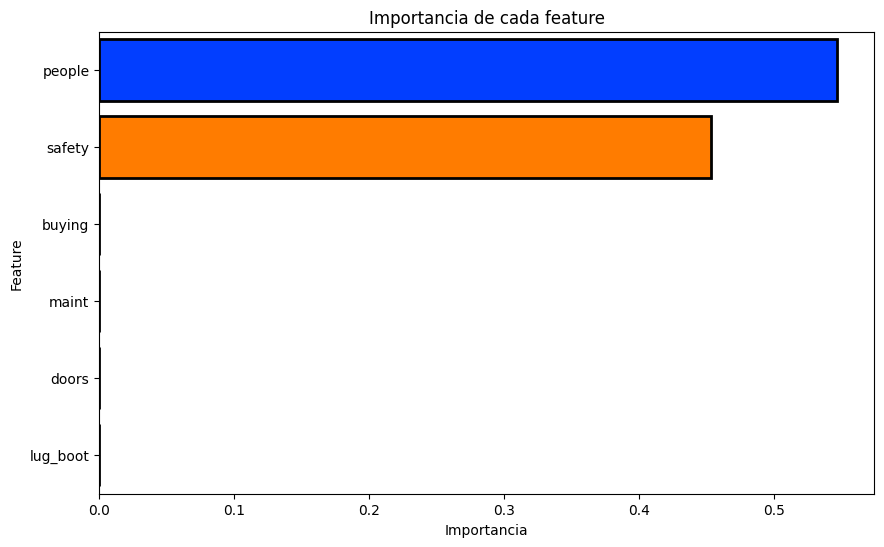

In [22]:
# Verificando el feature importance
importances = tree.feature_importances_
columns = X.columns

# Crear un DataFrame con los datos
importance_df = pd.DataFrame({'Column': columns, 'Importance': importances})

# Ordenar por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Column', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

# Título y etiquetas
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Feature')

# Mostrar el gráfico
plt.show()

## Modelo con las variables más importantes

In [23]:
# Separamos en X y Y
df_1 = df.copy()
X = df_1.drop(['class', 'buying', 'maint', 'doors', 'lug_boot'], axis=1)
y = df_1['class']

In [24]:
# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [25]:
ord_enc = OrdinalEncoder()
X = pd.DataFrame(ord_enc.fit_transform(X), columns=X.columns)
X.head()

,people,safety
0,0.0,1.0
1,0.0,2.0
2,0.0,0.0
3,0.0,1.0
4,0.0,2.0


In [26]:
X_train = ord_enc.fit_transform(X_train)
X_test = ord_enc.fit_transform(X_test)

In [27]:
# Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
# Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [29]:
# Calculo de las predicciones en train y test
y_train_pre_tree = tree.predict(X_train)
y_test_pre_tree = tree.predict(X_test)

In [30]:
# Accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pre_tree)
train_accuracy

0.7733664185277088

In [31]:
# Accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pre_tree)
test_accuracy

0.7591522157996147

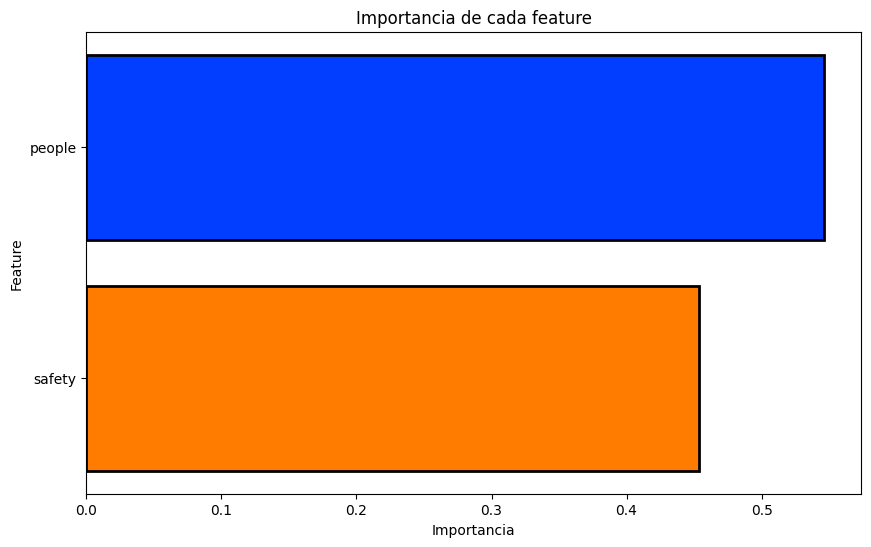

In [32]:
# Verificando el feature importance
importances = tree.feature_importances_
columns = X.columns

# Crear un DataFrame con los datos
importance_df = pd.DataFrame({'Column': columns, 'Importance': importances})

# Ordenar por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Column', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

# Título y etiquetas
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Feature')

# Mostrar el gráfico
plt.show()